<a href="https://colab.research.google.com/github/samobrien878/DS2002F24/blob/main/ACC_STATS_DS2002_HW_Completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1:

In [10]:
import pandas as pd
acc_df = pd.read_csv("acc_players-2324F.csv")
acc_df.columns = acc_df.iloc[0]
acc_df = acc_df[1:]
acc_df.head(5)

,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
1,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.2,0.615,4.1,-0.1,-6.4
2,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.5,0.5,NaN,NaN,3.5,0,-6.7
3,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
4,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0,1,NaN,1.1,0,-8.2
5,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18,2.9,7.9


#2:

In [18]:
acc_df['PTS'] = acc_df['PTS'].astype(int)
total_points = acc_df['PTS'].sum()
print(total_points)

38411


In [24]:
acc_df['MP'] = acc_df['MP'].astype(int)
most_mins = acc_df['MP'].max()
player_name = acc_df.loc[acc_df['MP'] == most_mins, 'Player'].values[0]
print(player_name)
print(most_mins)

Casey Morsell
1333


In [23]:
acc_df['TRB'] = acc_df['TRB'].astype(int)
acc_df = acc_df.sort_values(by='TRB', ascending=False)
print(acc_df[['Player','TRB']].head(5))

0             Player  TRB
6      Armando Bacot  380
179  Ian Schieffelin  340
91   Harrison Ingram  327
45    Mohamed Diarra  311
150    Norchad Omier  309


#3:

In [51]:
new_acc_df = acc_df
new_acc_df = acc_df[acc_df['MP'] >= 500]

highest_assists = new_acc_df['AST'].max()
print('Individual Assist Leader:')
print(new_acc_df.loc[new_acc_df['AST'] == highest_assists, 'Player'].values[0])
print("Total Individual Assists:"+ str(highest_assists)+"\n")

new_acc_df = new_acc_df.sort_values(by='AST', ascending=False)
print('Top 3 Assist Leaders:')
print(new_acc_df[['Player','AST']].head(3))
print("\n")

new_acc_df = new_acc_df.sort_values(by= 'BLK', ascending=False)
print('Top 3 Block Leaders:')
print(new_acc_df[['Player','BLK']].head(3))


Individual Assist Leader:
Jalen Warley
Total Individual Assists:92

Top 3 Assist Leaders:
0             Player AST
202     Jalen Warley  92
204    Jamir Watkins  91
190  Kyle Sturdivant  91


Top 3 Block Leaders:
0            Player BLK
157    Wooga Poplar   9
142    Tyler Nickel   8
108  J.R. Konieczny   8


#4

In [66]:
pts_by_school = acc_df.groupby('School')['PTS'].sum()
print("Points by School:")
print(pts_by_school)
print("\n")

acc_df['AST'] = acc_df['AST'].astype(int)
ast_by_school = acc_df.groupby('School')['AST'].sum()
print("Assists by School:")
print(ast_by_school)
print("\n")

pts_by_school = pts_by_school.sort_values(ascending=False).head(3)
print("Top scoring schools:")
print(pts_by_school)


Points by School:
School
Boston College    2667
Clemson           2785
Duke              2830
Florida State     2526
Georgia Tech      2272
Louisville        2304
Miami (FL)        2424
NC State          3101
North Carolina    3032
Notre Dame        2113
Pittsburgh        2495
Syracuse          2442
Virginia          2140
Virginia Tech     2547
Wake Forest       2733
Name: PTS, dtype: int64


Assists by School:
School
Boston College    509
Clemson           533
Duke              551
Florida State     406
Georgia Tech      425
Louisville        356
Miami (FL)        454
NC State          536
North Carolina    536
Notre Dame        335
Pittsburgh        452
Syracuse          442
Virginia          509
Virginia Tech     514
Wake Forest       429
Name: AST, dtype: int64


Top scoring schools:
School
NC State          3101
North Carolina    3032
Duke              2830
Name: PTS, dtype: int64


#5:

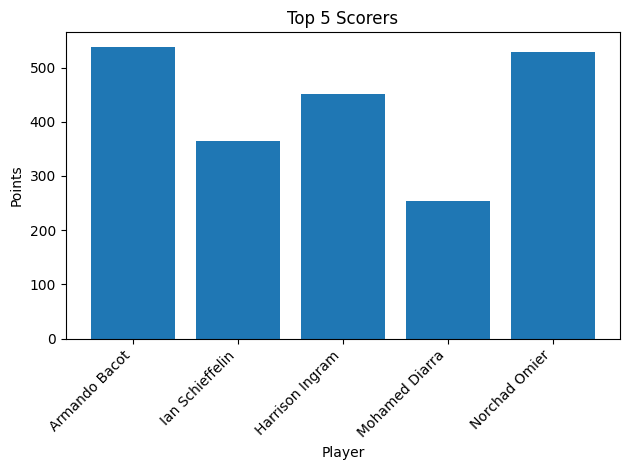

In [72]:
import matplotlib.pyplot as plt
acc_df.sort_values(by='PTS', ascending=False)
top_5_scorers = acc_df[['Player', 'PTS']].head(5)
plt.bar(top_5_scorers['Player'], top_5_scorers['PTS'])
plt.xlabel('Player')
plt.ylabel('Points')
plt.title('Top 5 Scorers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


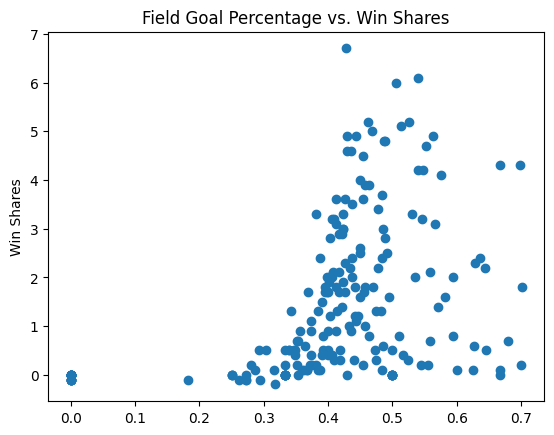

Correlation between FG% and WS: 0.42


In [91]:
import matplotlib.pyplot as plt
import numpy as np

correlation_test = acc_df[['FG%','WS']]
plt.scatter(correlation_test['FG%'].astype(float), correlation_test['WS'].astype(float))
plt.ylabel('Win Shares')
plt.title('Field Goal Percentage vs. Win Shares')
plt.show()



correlation_test = correlation_test.dropna()
corr = correlation_test['FG%'].astype(float).corr(correlation_test['WS'].astype(float))
print("Correlation between FG% and WS:", str(corr.round(2)))

#Short Answers:

The biggest thing I learned from pandas was the graphing and corrleational aspects in question five. I have been familiar with pandas, but I wasn't super familiar with the statistical side. Cool to see there is more analysis that can be done rather than just data analysis.

The most challenging aspect of the assignment was the fact that barley any of the columns were saved as numeric. Its hard to do data manipulation when all of the data points are strings. To overcome this, I simply casted each of the necessary columns to floats or ints.

The insights from analyzing ACC basketball can be applied to many other fields. For instance, in my major(psychgology) it could be useful to do similar correlational analysis in relation to mental illness. For instance, these x number of predictor charactericts correlate to these y instances of mental illness.